In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)

In [2]:
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.style.use('ggplot')


plt.rcParams['font.size']=BIGGER_SIZE          # controls default text sizes
plt.rcParams['axes.titlesize']=BIGGER_SIZE     # fontsize of the axes title
plt.rcParams['axes.labelsize']=BIGGER_SIZE    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['ytick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['legend.fontsize']=BIGGER_SIZE    # legend fontsize
plt.rcParams['figure.titlesize']=BIGGER_SIZE  # fontsize of the figure title

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#plt.rcParams['legend.fontsize'] = 22

In [3]:
df_assets = df_raw[["rssdid", "name", 'year', "quarter","assets", "cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "interestratederivatives"]]
df_liab = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","fedfundsrepoliab" ,"deposits","foreigndep", "otherborrowedmoney", "tradingliabilities", "liabilities"]]
df_asset_median = df_assets.groupby(["year", "quarter"]).median()
df_liab_median = df_liab.groupby(["year", "quarter"]).median()
df_asset_median = df_asset_median.reset_index()
df_liab_median = df_liab_median.reset_index()
df_liab_median

,year,quarter,rssdid,assets,equity,fedfundsrepoliab,deposits,foreigndep,otherborrowedmoney,tradingliabilities,liabilities
0,1976.0,1.0,518859.0,15427.0,1256.0,0.0,13999.0,0.0,0.0,NaN,14197.0
1,1976.0,2.0,519300.0,15886.5,1295.0,0.0,14327.5,0.0,0.0,NaN,14636.5
2,1976.0,3.0,519183.5,16266.0,1346.0,0.0,14676.5,0.0,0.0,NaN,14952.0
3,1976.0,4.0,519146.0,16866.0,1348.0,0.0,15269.0,0.0,0.0,NaN,15524.0
4,1977.0,1.0,518859.0,17211.0,1398.0,0.0,15547.0,0.0,0.0,NaN,15790.0
5,1977.0,2.0,518849.5,17659.0,1433.5,0.0,15846.0,0.0,0.0,NaN,16161.5
6,1977.0,3.0,518429.5,18157.5,1488.5,0.0,16296.5,0.0,0.0,NaN,16683.5
7,1977.0,4.0,518279.0,19128.0,1492.0,0.0,17300.0,0.0,0.0,NaN,17569.0
8,1978.0,1.0,518550.0,19297.0,1551.0,0.0,17410.0,0.0,0.0,NaN,17753.0
9,1978.0,2.0,518617.0,20070.0,1602.5,0.0,18026.0,0.0,0.0,NaN,18469.0


In [7]:
df_assets_4 = df_assets[df_assets.quarter==4]
df_assets_4.set_index("rssdid", inplace=True)
df_assets_4[df_assets_4.assets>10000000000]

,name,year,quarter,assets,cash,fedfundsrepoasset,securities,loansnet,tradingassets,interestratederivatives
rssdid,,,,,,,,,,


In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
df_1980 = df_assets_4[df_assets_4.year==1980]
#df_1980 = df_1980[df_1980.assets<100000]
#print(df_1980)
bins = [0, 100000, 1000000, 10000000, 100000000]
ax.ticklabel_format(useOffset=False, style='plain')
n, bins, patches = ax.hist(df_1980.assets,bins=bins, density=True)
ax.set_xticks(bins)
#print(df_1980[df_1980.assets>1000000])
print(n)



In [6]:


freq_df = pd.DataFrame()

year = 1980


for i in range(7):
    temp_df = df_assets_4[df_assets_4.year==year]
    
    temp_freq = temp_df.assets.apply(pd.Series.value_counts, bins=[0.001, 100000, 1000000, 10000000, 10000000000])
    
    s = temp_freq.apply(np.sum, axis=0)
    print(s)
    freq_df = freq_df.append(s, ignore_index=True)
    
    year = year + 5

    

#freq_df['sortkey']=s_df.index.map(lambda x : x.left)
#freq_df=freq_df.sort_values('sortkey')
#freq_df.drop(["sortkey"], axis=1, inplace=True)

freq_df
    

(-0.001, 100000.0]             12717.0
(10000000.0, 10000000000.0]       18.0
(1000000.0, 10000000.0]          174.0
(100000.0, 1000000.0]           1507.0
dtype: float64
(-0.001, 100000.0]             11674.0
(10000000.0, 10000000000.0]       27.0
(1000000.0, 10000000.0]          287.0
(100000.0, 1000000.0]           2287.0
dtype: float64
(-0.001, 100000.0]             9145
(10000000.0, 10000000000.0]      49
(1000000.0, 10000000.0]         325
(100000.0, 1000000.0]          2693
dtype: int64
(-0.001, 100000.0]             6613
(10000000.0, 10000000000.0]      75
(1000000.0, 10000000.0]         342
(100000.0, 1000000.0]          2843
dtype: int64
(-0.001, 100000.0]             4810
(10000000.0, 10000000000.0]      80
(1000000.0, 10000000.0]         307
(100000.0, 1000000.0]          3055
dtype: int64
(-0.001, 100000.0]             3435
(10000000.0, 10000000000.0]      80
(1000000.0, 10000000.0]         381
(100000.0, 1000000.0]          3562
dtype: int64
(-0.001, 100000.0]            

,"(-0.001, 100000.0]","(100000.0, 1000000.0]","(1000000.0, 10000000.0]","(10000000.0, 10000000000.0]"
0,12717.0,1507.0,174.0,18.0
1,11674.0,2287.0,287.0,27.0
2,9145.0,2693.0,325.0,49.0
3,6613.0,2843.0,342.0,75.0
4,4810.0,3055.0,307.0,80.0
5,3435.0,3562.0,381.0,80.0
6,2313.0,3670.0,413.0,83.0


In [75]:

freq_df_T = freq_df.T
freq_df_T.rename(columns={0 : "1980", 1 : "1985", 2: "1990", 3: "1995", 4: "2000", 5: "2005", 6: "2010"}, inplace=True)
freq_df_T


,1980,1985,1990,1995,2000,2005,2010
"(-0.001, 100000.0]",12717.0,11674.0,9145.0,6613.0,4810.0,3435.0,2313.0
"(100000.0, 1000000.0]",1507.0,2287.0,2693.0,2843.0,3055.0,3562.0,3670.0
"(1000000.0, 10000000.0]",174.0,287.0,325.0,342.0,307.0,381.0,413.0
"(10000000.0, 10000000000.0]",18.0,27.0,49.0,75.0,80.0,80.0,83.0


Text(0.5, 1.0, 'Count of banks per assets intervall')

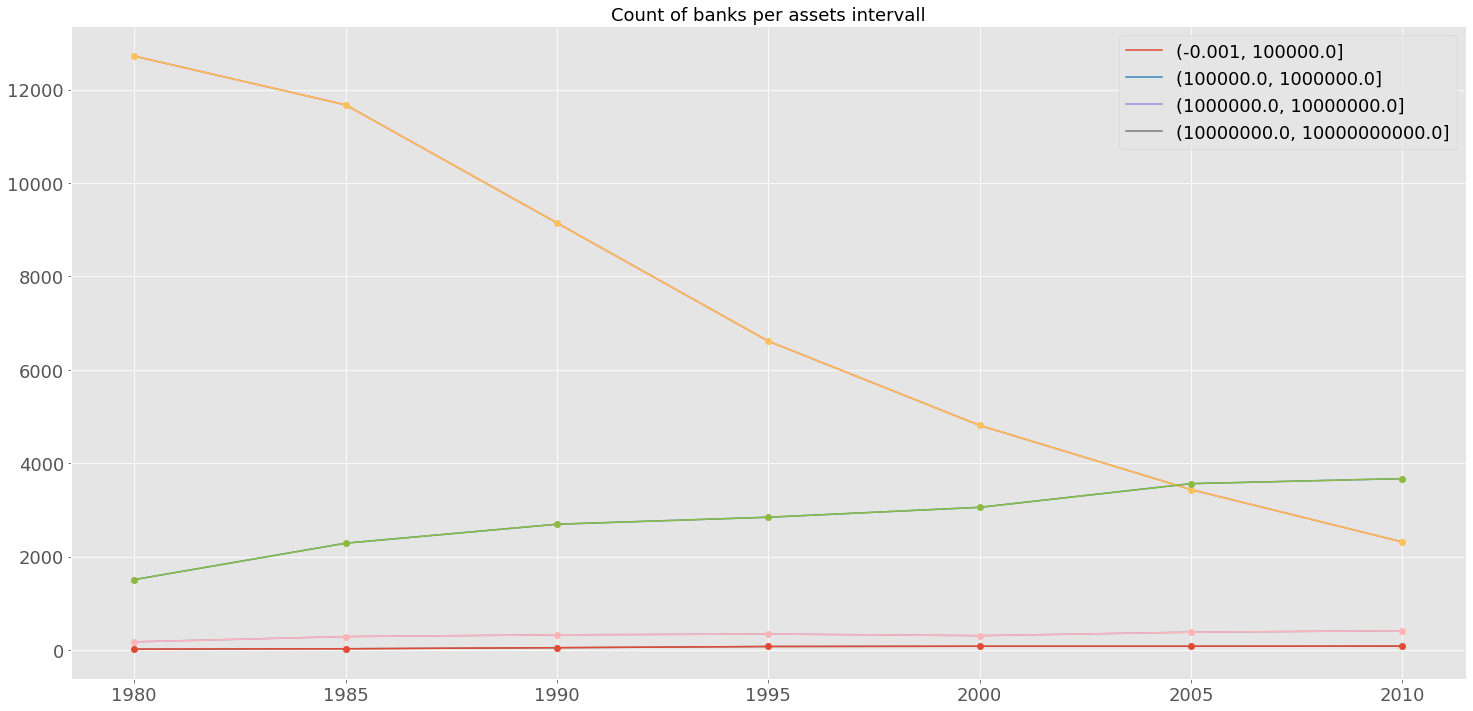

In [76]:
fig, ax = plt.subplots(figsize=(25,12))
freq_df_T_T = freq_df_T.T
series = freq_df_T_T.iloc[:,0]
df2 = pd.DataFrame(series)
ax.plot(freq_df_T_T)
ax.plot(freq_df_T_T, "o-")
ax.legend(freq_df_T_T.columns)
#freq_df_T_T.iloc[:,0].plot()
ax.set_title("Count of banks per assets intervall")

In [ ]:
frequency_df = df_1980.assets.apply(pd.Series.value_counts, bins=[0, 100000, 1000000, 10000000, 1000000000])
frequency_df


In [ ]:
s = frequency_df.apply(np.sum, axis=0)
s_df = pd.DataFrame(s, columns=["assets"])
s_df['sortkey']=s_df.index.map(lambda x : x.left)
s_df=s_df.sort_values('sortkey')
s_df.drop(["sortkey"], axis=1, inplace=True)

In [ ]:


s_df.index = s_df.index.astype(str)

fig, ax = plt.subplots(figsize=(20,12))

s_df.plot.bar(ax=ax)
ax.set_xticklabels(clean_frequency_df.index, rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.09, p.get_height() * 1.025))

In [ ]:
print(frequency_df)
sum1 = frequency_df.iloc[:,0].sum()
sum2 = frequency_df.iloc[:,1].sum()
sum3 = frequency_df.iloc[:,2].sum()
sum4 = frequency_df.iloc[:,3].sum()
dic = { "(-0.001, 100000.0]" : sum1, "(100000.0, 1000000.0]" : sum4, "(1000000.0, 10000000.0]" : sum3, "10000000.0, 100000000.0": sum2 }
clean_frequency_df = pd.Series(dic)
clean_frequency_df

fig, ax = plt.subplots(figsize=(20,12))

clean_frequency_df.plot.bar(ax=ax)
ax.set_xticklabels(clean_frequency_df.index, rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.10, p.get_height() * 1.025))
#df_big_banks_median = df_big_banks.groupby(["year", "quarter"]).median()
#frequency_df.groupby(frequency_df.index ,axis="columns").sum


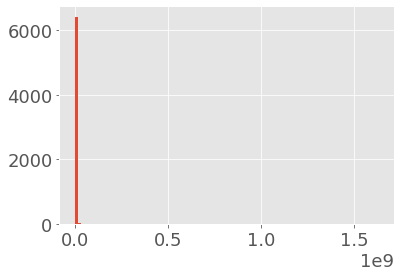

In [57]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df_2000.assets, bins=100) #to preset bins for next graph

count    6.479000e+03
mean     1.841031e+06
std      3.499095e+07
min      1.391000e+03
25%      7.306900e+04
50%      1.450250e+05
75%      3.105070e+05
max      1.631621e+09
Name: assets, dtype: float64

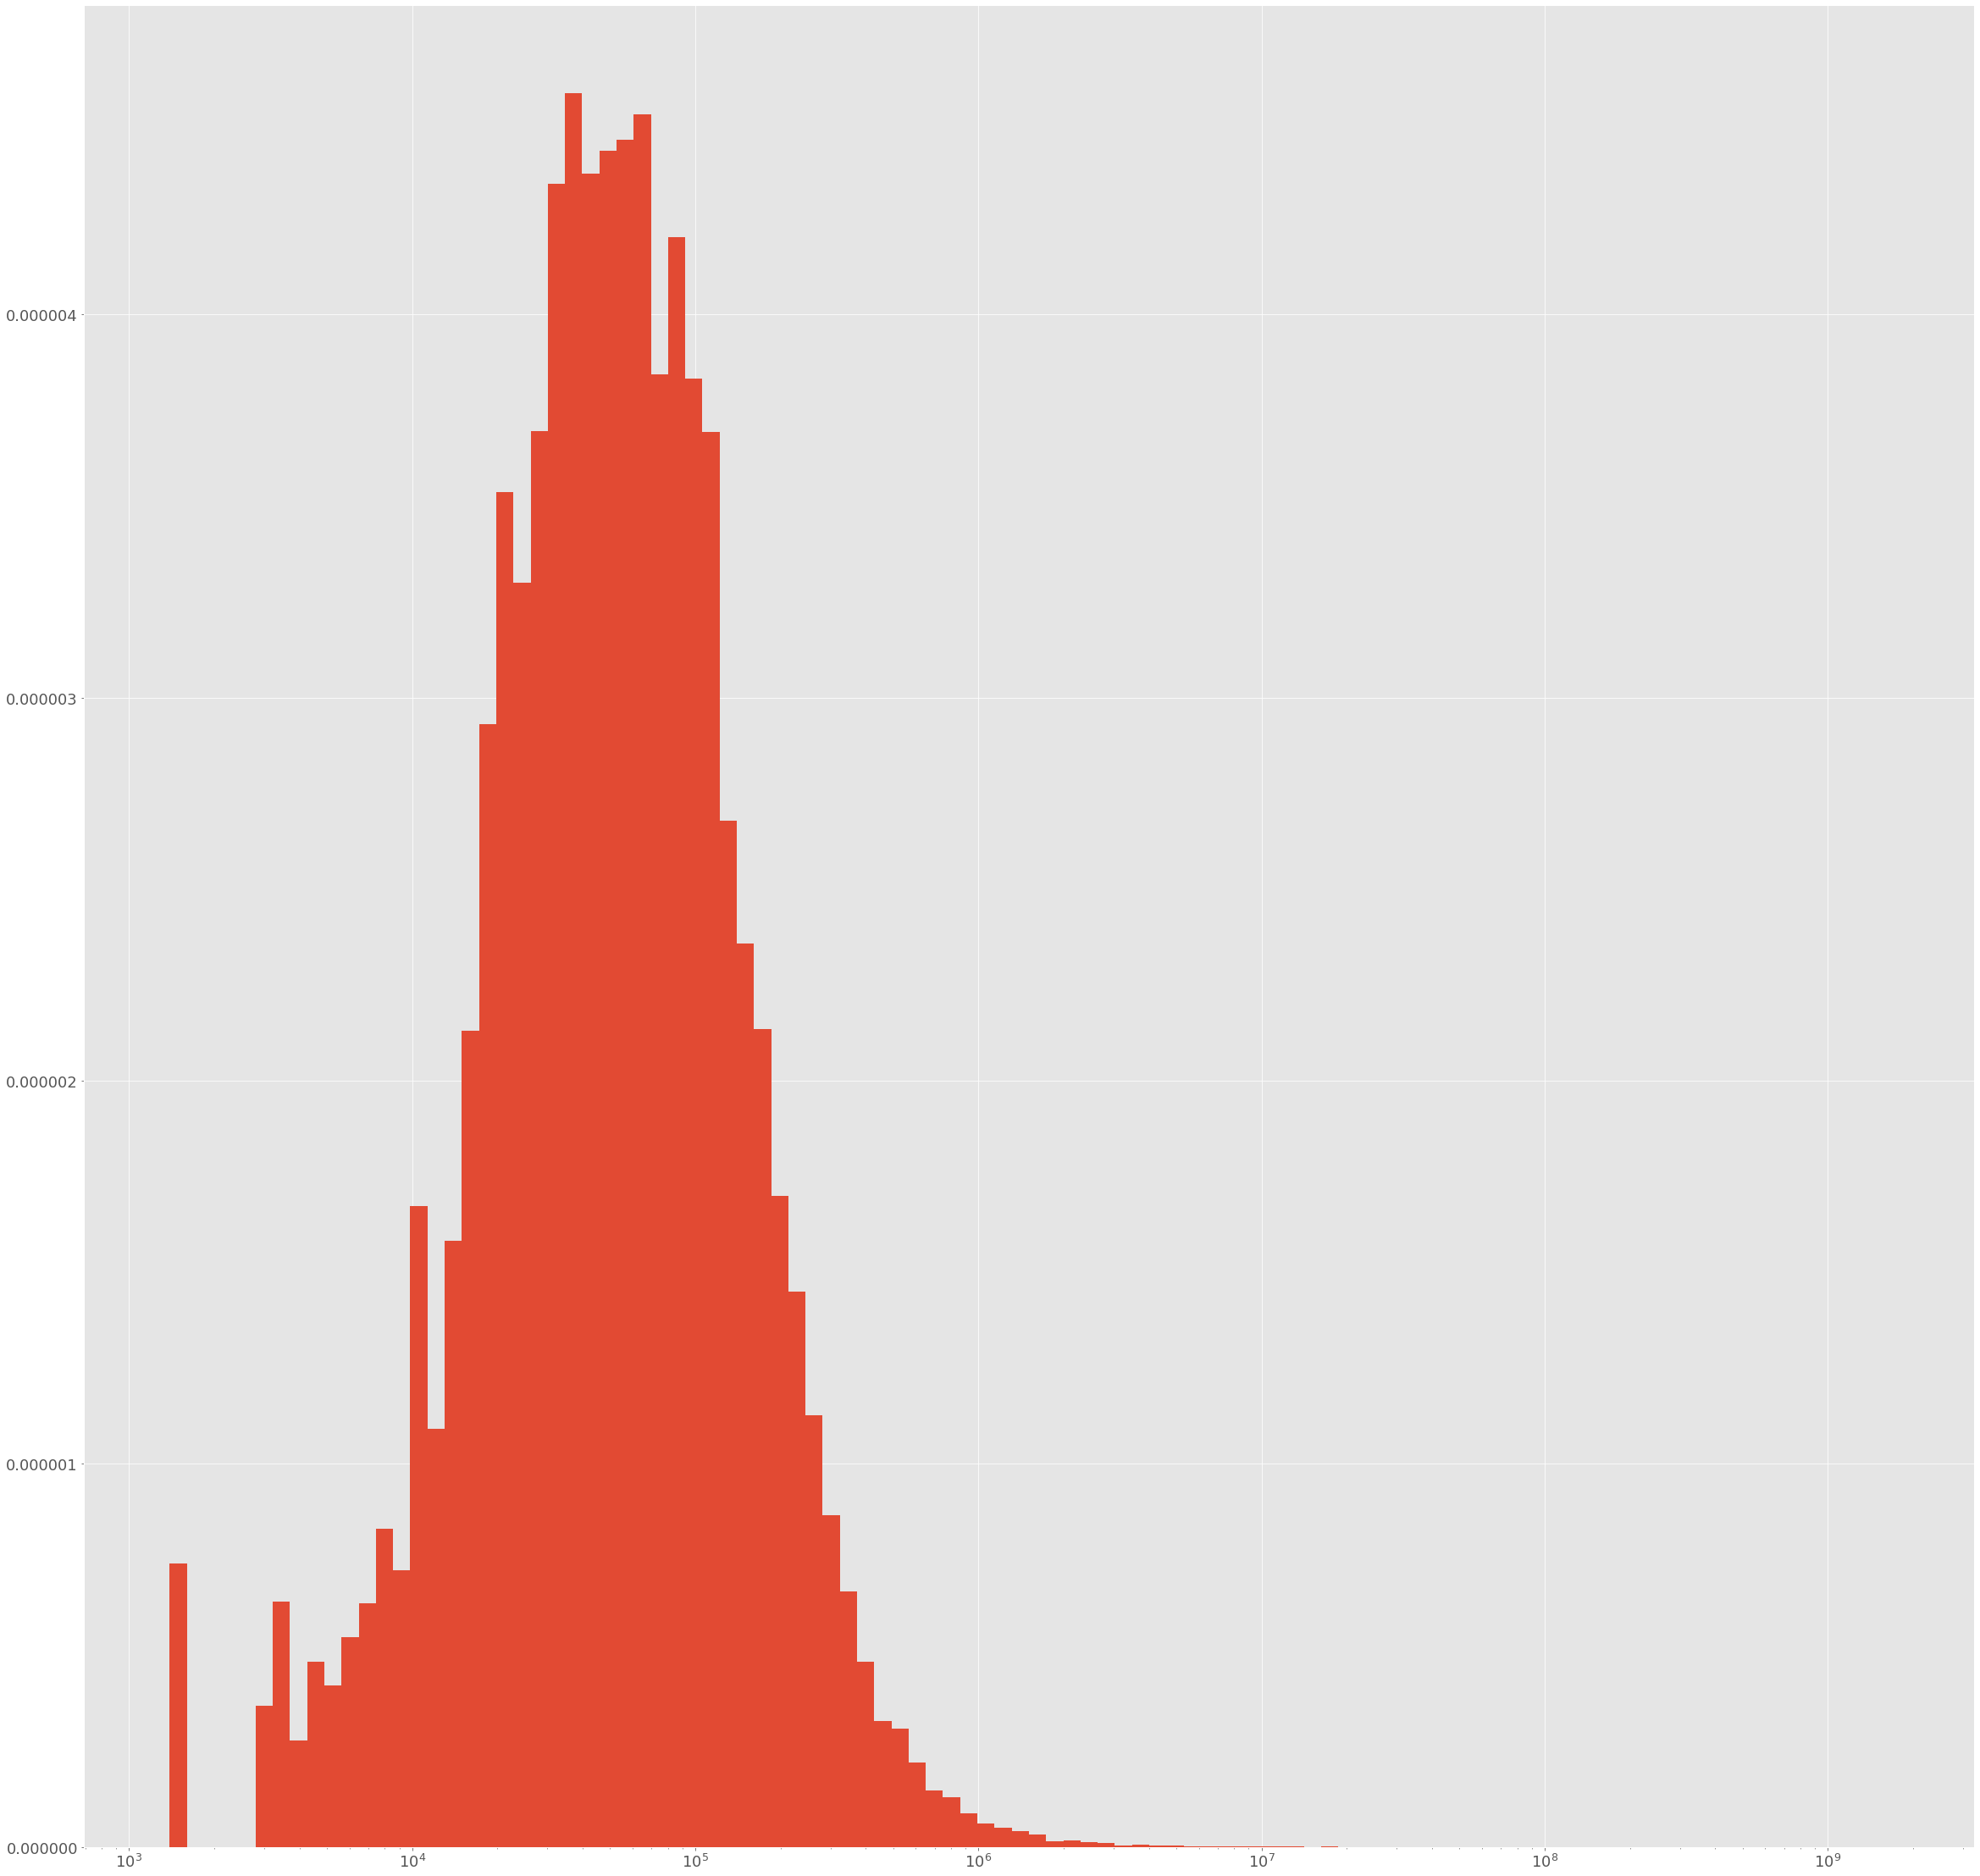

In [69]:
fig, ax = plt.subplots(figsize=(40,40))
df_2000 = df_assets_4[df_assets_4.year==2010]
#df_2000 = df_2000[df_2000.assets<100000]
#print(df_1980)
ax.ticklabel_format(useOffset=False, style='plain')
#n, bins, patches = ax.hist(df_2000.assets, bins=500)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
n, bins, patches = ax.hist(df_2000.assets,bins=logbins, density=True)
plt.xscale('log')
df_2000.assets.describe()


array([1.39100000e+03, 8.29719805e+04, 1.64552961e+05, ...,
       1.63145784e+09, 1.63153942e+09, 1.63162100e+09])

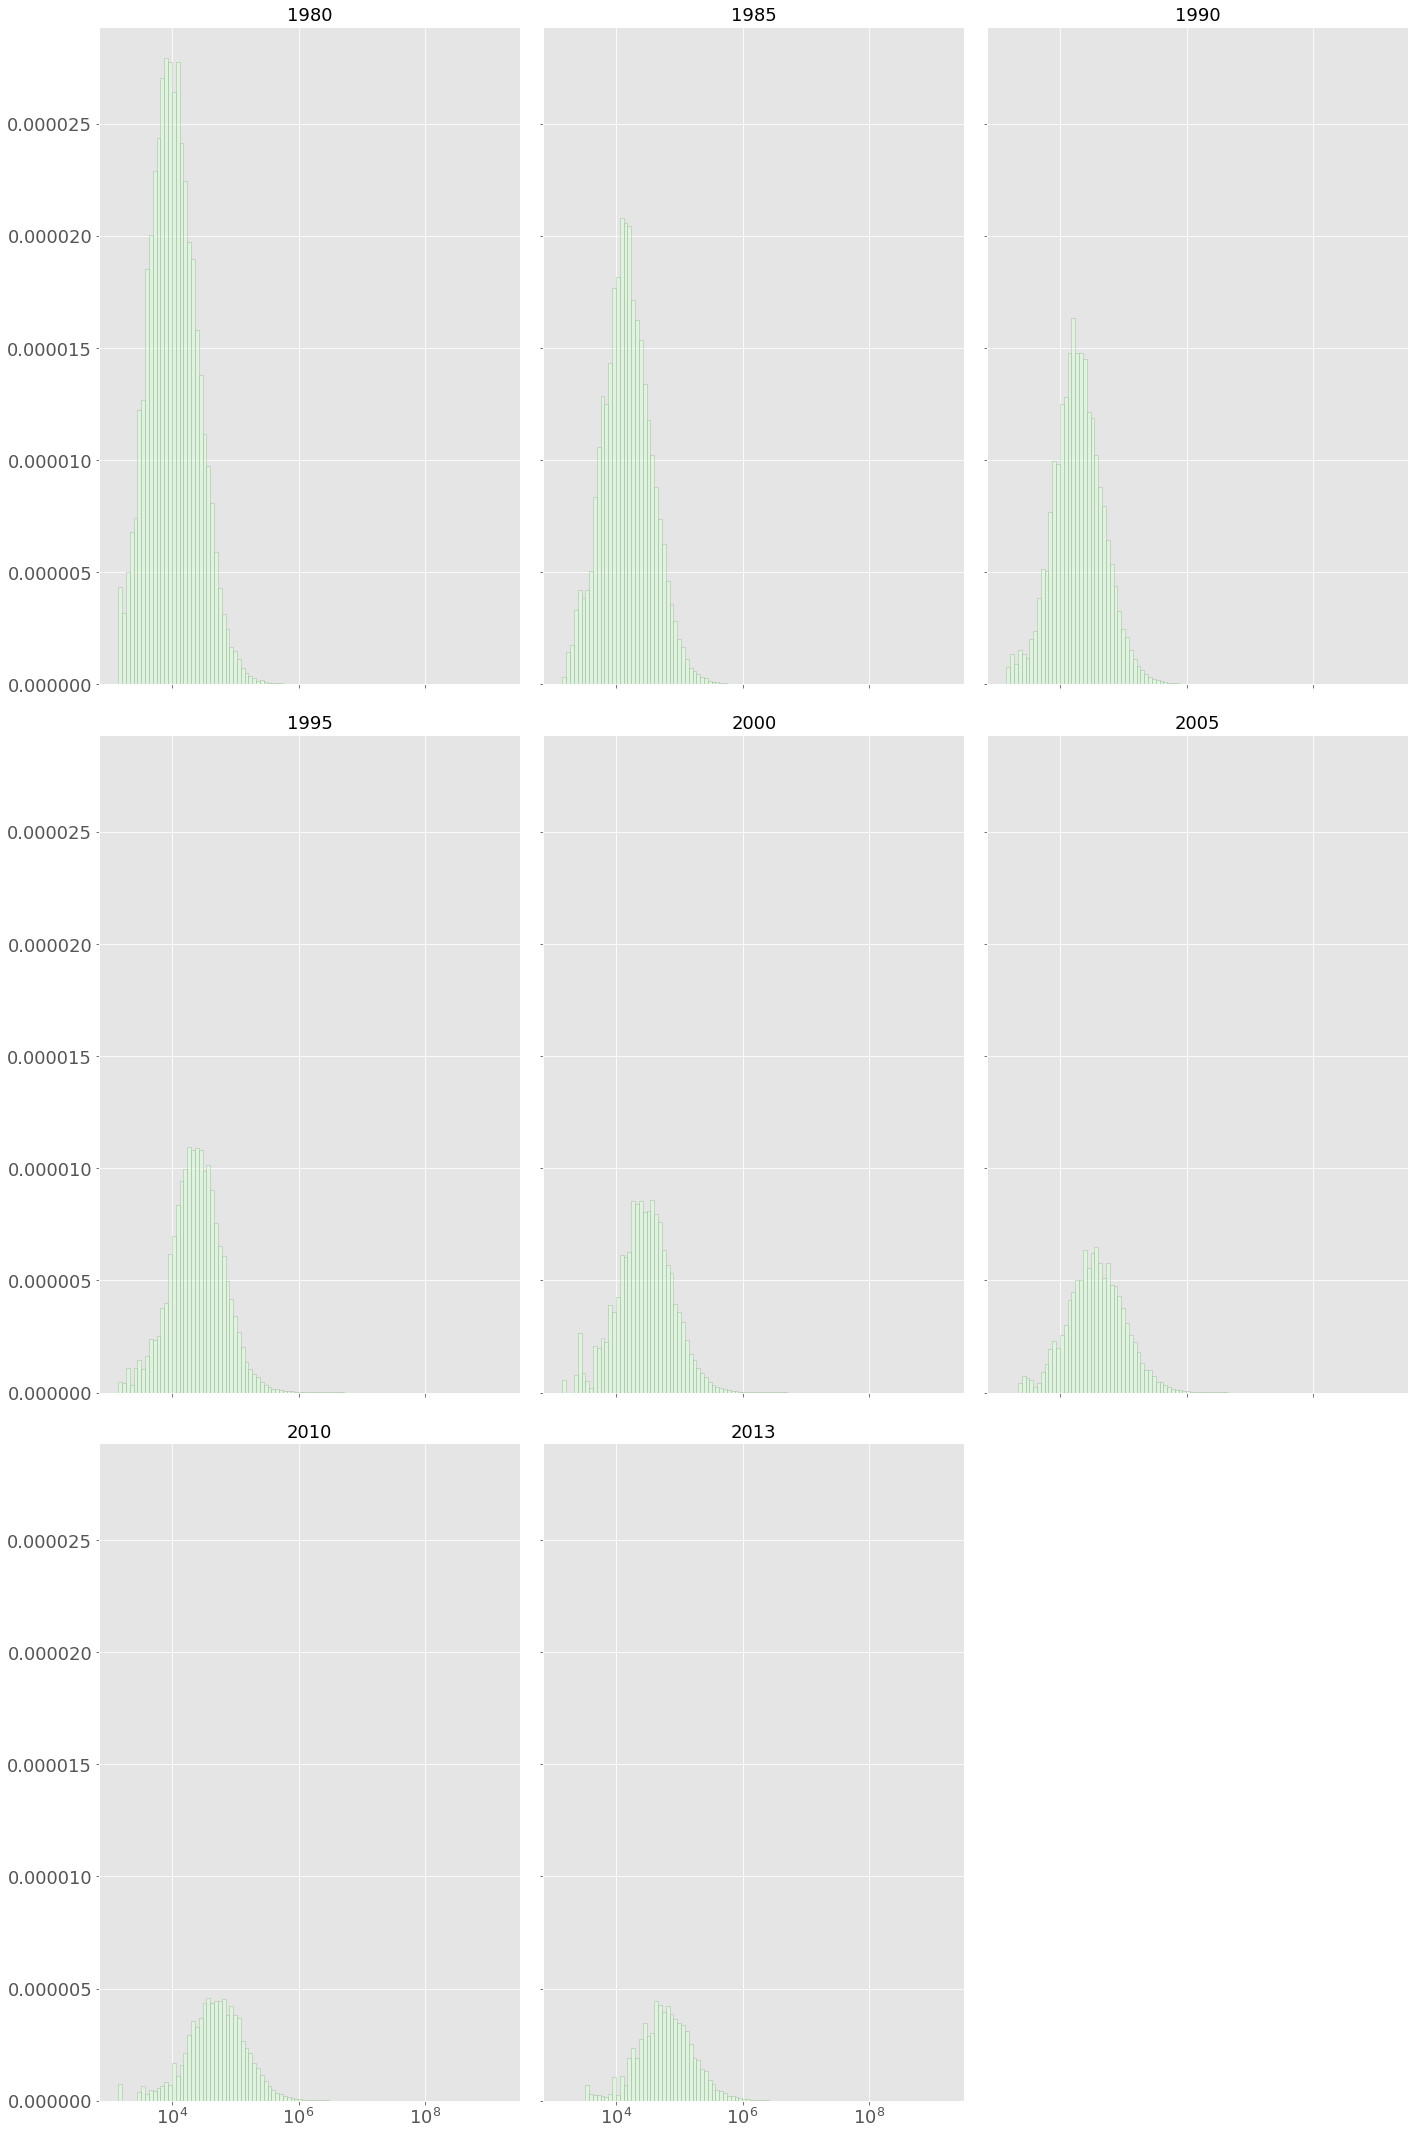

In [64]:
#df = df_all.reset_index(level="year")
#print(df[df.leverageRatio>20])
#df = df[(df.leverageRatio > 0)]
#print(df)
fig, ax = plt.subplots(3, 3, figsize=(20,30), sharey=True, sharex=True)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
ax = ax.ravel() 
year=1980
x = 0
temp_df = pd.DataFrame()
for x in range(7):
    temp_df = df_assets_4[df_assets_4.year==year]
    #print(temp_df.assets)
    plt.xscale('log')
    n, bins, patches = ax[x].hist(temp_df.assets, bins=logbins ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
    ax[x].set_title(year)
    #ax[x].set(xticks=bins)
    #ax[x].text(14.5,0.12,temp_df.assets.describe().round(2).to_string())
    #ax[x].text(16.5,0.175, "Mean: " + str(round(temp_df.leverageRatio.mean(),2)))
    #ax[x].text(17,0.165, "Median: " + str(temp_df.leverageRatio.median()))
    #for tick in ax[x].get_xticklabels():
        #tick.set_rotation(60)
    #print(bins)
    #ax[x].set_xticklabels(bins, rotation=60)
    year = year + 5
    
year = year - 2
temp_df = df_assets_4[df_assets_4.year==year]
n, bins, patches = ax[7].hist(temp_df.assets, bins=logbins ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
#for tick in ax[7].get_xticklabels():
#        tick.set_rotation(60)
ax[7].set_title(year)
#ax[1].text(1,1, temp_df.leverageRatio.mean())
#ax[7].set(xticks=bins)
#ax[7].text(14,0.12,temp_df.assets.describe().round(2).to_string())
fig.delaxes(ax[8])
#fig.suptitle('Categorical Plotting')
#plt.subplots_adjust(left=0.1, bottom=0.02, right=0.75)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/Leverage/MedianBank_AssetDistribution_8013.png')
#y = temp_df.leverageRatio.describe()
#print(type(y))


Median banks asset side by category (small, middle, big)

In [143]:
#big bank
df_big_banks = df_assets[df_assets.assets >= 10000000]
df_big_banks_liab = df_liab[df_liab.assets >= 10000000]
df_big_banks_median = df_big_banks.groupby(["year", "quarter"]).median()
df_big_banks_median_liab = df_big_banks_liab.groupby(["year", "quarter"]).median()
#middle bank
df_middle_banks = df_assets[(df_assets.assets < 10000000) & (df_assets.assets >= 1000000)]
df_middle_banks_liab = df_liab[(df_liab.assets < 10000000) & (df_liab.assets >= 1000000)]
df_middle_banks_median = df_middle_banks.groupby(["year", "quarter"]).median()
df_middle_banks_median_liab = df_middle_banks_liab.groupby(["year", "quarter"]).median()
#small bank
df_small_banks = df_assets[df_assets.assets < 1000000]
df_small_banks_liab = df_liab[df_liab.assets < 1000000]
df_small_banks_median = df_small_banks.groupby(["year", "quarter"]).median()
df_small_banks_median_liab = df_small_banks_liab.groupby(["year", "quarter"]).median()


In [124]:
df_middle_banks_median

rssdid     assets      cash  fedfundsrepoasset  securities   loansnet  tradingassets  interestratederivatives
year   quarter                                                                                                                 
1976.0 1.0      502909.0  1720732.0  302133.0            66623.0    349137.0   883728.5            NaN                      NaN
       2.0      502909.0  1669312.0  261485.5            68722.5    327020.0   827200.5            NaN                      NaN
       3.0      501105.0  1713458.0  267218.0            60000.0    345192.0   859556.0            NaN                      NaN
       4.0      499440.5  1719788.0  294811.0            83800.0    350703.5   847611.5            NaN                      NaN
1977.0 1.0      494500.0  1651633.0  260147.0            55474.0    345074.0   840199.0            NaN                      NaN
       2.0      499440.5  1684782.0  271801.5            66351.0    343438.0   849149.5            NaN                      NaN
       3.0      491224.0  1657443.0  255831.0            64596.0    344785.0   868729.0            NaN                      NaN
       4.0      497776.0  1526673.0  284094.0            69000.0    324676.0   867264.0            NaN                      NaN
1978.0 1.0      491224.0  1612875.0  258384.0            59713.0    327635.0   895261.0            NaN                      NaN
       2.0      484990.5  1638097.5  264688.5            48607.5    330281.5   925242.0            NaN                      NaN
       3.0      485559.0  1611167.0  253257.0            42350.0    330645.0   940971.0            NaN                      NaN
       4.0      488391.5  1678928.5  276623.0            71556.5    320894.0   943964.0            NaN                      NaN
1979.0 1.0      484422.0  1726006.0  252151.0            50000.0    328876.0   988076.0            NaN                      NaN
       2.0      484990.5  1763742.5  268052.5            70620.0    326774.0  1001593.0            NaN                      NaN
       3.0      477522.0  1779639.5  264695.5            56750.0    337093.5  1032252.5            NaN                      NaN
       4.0      482325.0  1815231.5  303365.5            73944.0    337419.5  1045090.5            NaN                      NaN
1980.0 1.0      484422.0  1808332.0  280060.0            55992.0    338115.0  1043778.0            NaN                      NaN
       2.0      484422.0  1843476.0  317263.0            65579.0    358132.0  1019295.0            NaN                      NaN
       3.0      485559.0  1825008.0  284114.0            55912.0    359586.0   993902.0            NaN                      NaN
       4.0      477522.0  1891303.5  313671.5            66926.0    341963.5   971505.5            NaN                      NaN
1981.0 1.0      484990.5  1827527.0  312994.0            62528.5    350992.5   967425.5            NaN                      NaN
       2.0      480228.0  1844217.0  324567.0            67775.0    344656.0   955136.0            NaN                      NaN
       3.0      485559.0  1887972.0  307906.0            75543.0    346467.0   994661.0            NaN                      NaN
       4.0      484990.5  1965290.5  349990.5            95034.0    332072.5   969808.0            NaN                      NaN
1982.0 1.0      480228.0  2008669.0  328359.0            78597.0    338250.0   998667.0            NaN                      NaN
       2.0      477522.0  2048392.0  308464.5            75779.0    337601.0  1009923.5            NaN                      NaN
       3.0      474708.5  2060786.5  321874.0            81502.5    347324.0  1007263.5            NaN                      NaN
       4.0      477522.0  1983714.5  326599.5           106737.5    357366.5   946033.5            NaN                      NaN
1983.0 1.0      474601.0  1941692.0  312920.0            77000.0    375805.0   970393.0            NaN                      NaN
       2.0      474708.5  1930773.5  282750.0     

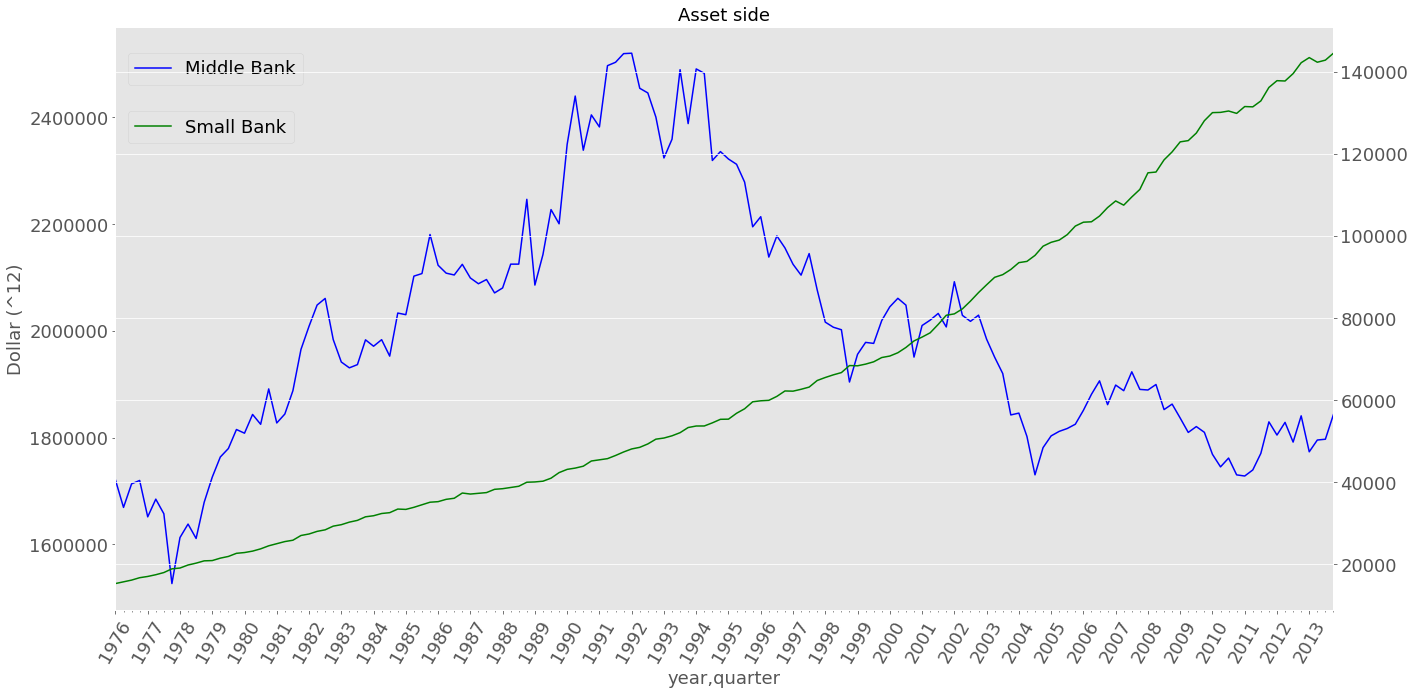

In [125]:
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Asset side")
ax.set_ylabel("Dollar (^12)")
#df_big_banks_median.assets.plot(ax=ax)
df_middle_banks_median.assets.plot(ax=ax, style="b-")
df_small_banks_median.assets.plot(ax=ax2, style="g-")
#plt.plot([df_aggOnePercent.assets, df_aggFivePercent.assets, df_aggTenPercent.assets, df_aggFiftyPercent.assets, df_agg.assets])
ax.set_xticklabels(years, rotation=60)
ax.legend(["Middle Bank"],loc=(0.01, 0.9))
ax2.legend(["Small Bank"], loc=(0.01, 0.8))
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_BanksAssetsperCat_7613.png')

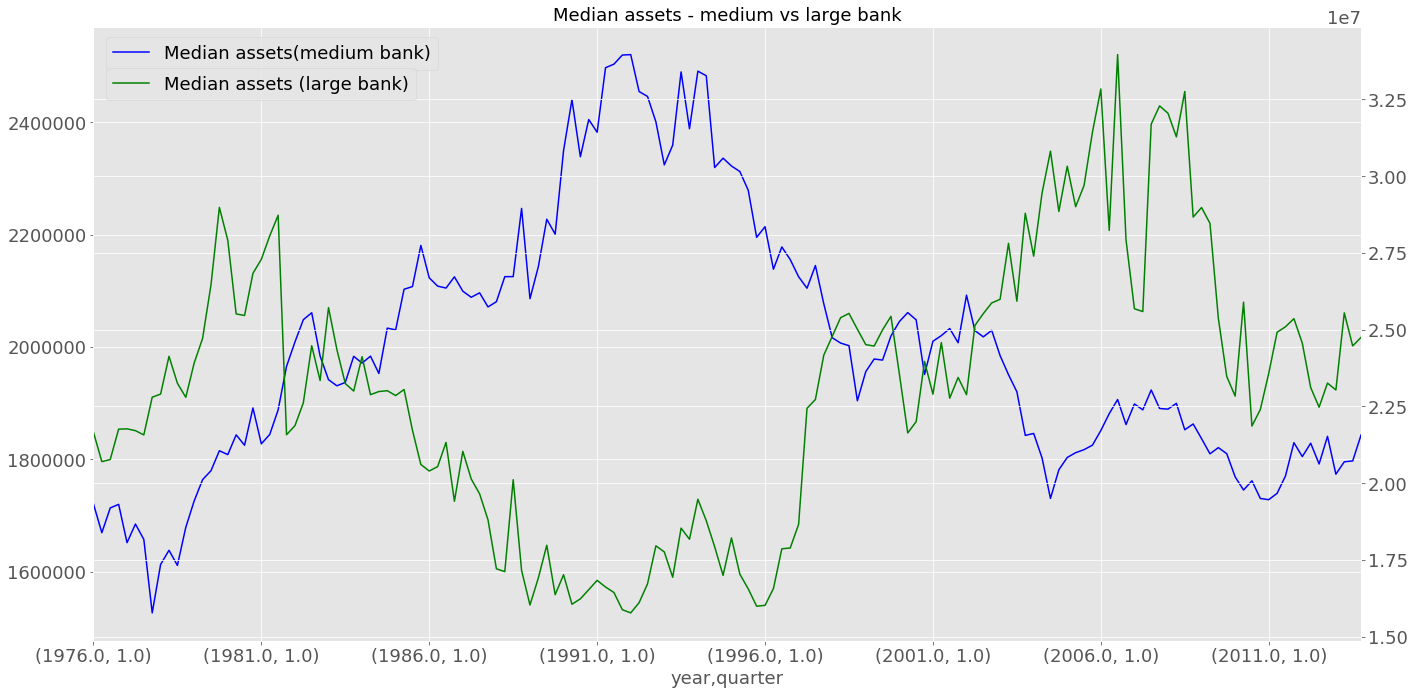

In [126]:
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
df_middle_banks_median.assets.plot(ax=ax, style="b-")
df_big_banks_median.assets.plot(ax=ax2, style="g-")
ax.legend(["Median assets(medium bank)"],loc=(0.01, 0.93))
ax2.legend(["Median assets (large bank)"], loc=(0.01, 0.88))
ax.set_title("Median assets - medium vs large bank")
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/MedianBank_MiddlevsBigMedianBankAssets_7613.png')

Comparing assets development of all three bank sizes

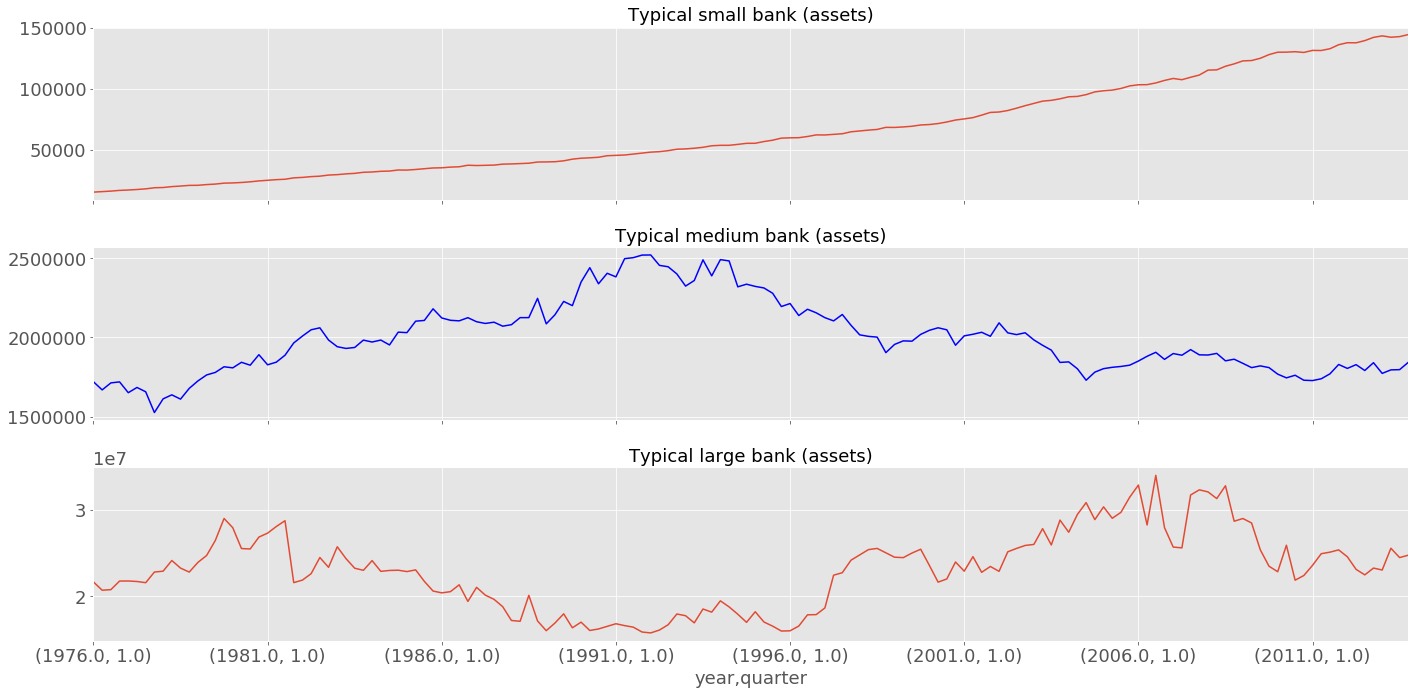

In [140]:
fig, ax = plt.subplots(3,1, figsize=(20,10) ,sharex=True)
ax = ax.ravel()

df_small_banks_median.assets.plot(ax=ax[0])
ax[0].set_title("Typical small bank (assets)")
df_middle_banks_median.assets.plot(ax=ax[1], style="b-")
ax[1].set_title("Typical medium bank (assets)")
df_big_banks_median.assets.plot(ax=ax[2])
ax[2].set_title("Typical large bank (assets)")
#fig.suptitle("Assets (small vs medium vs large)")

plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/MedianBank_SmallvsMiddlevsBigMedianBankAssets_7613.png')
#ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=60)

Small bank financing

In [164]:
df_small_banks_median_liab

df_agg_share = pd.DataFrame()

for (columnName, columnData) in df_small_banks_median_liab.iteritems():
    newcolumn = "share" + columnName
    df_agg_share[newcolumn] = df_small_banks_median_liab[columnName]/df_small_banks_median_liab.assets
    
    
df_agg_share.drop(["sharerssdid" , "shareassets", "shareliabilities"], axis=1, inplace=True)

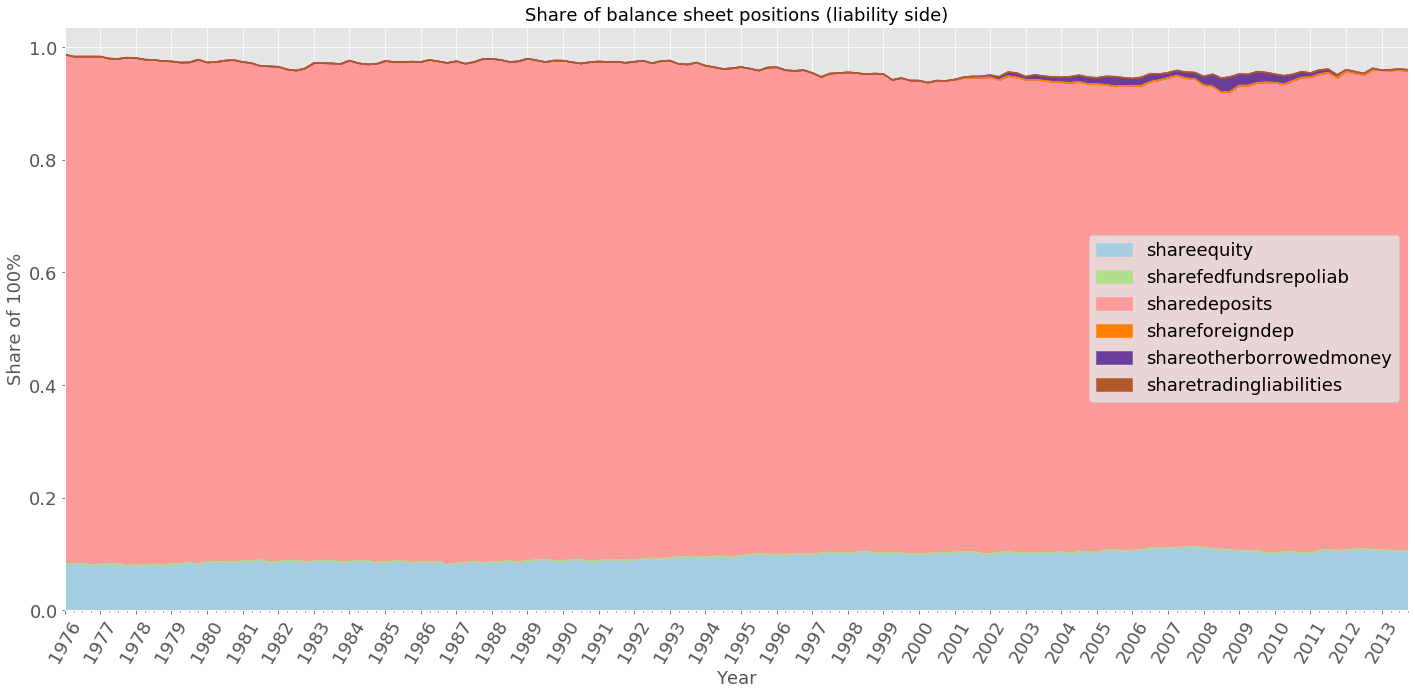

In [165]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of balance sheet positions (liability side)")
ax.set_ylabel("Share of 100%")
#df_agg.assets.plot(ax=ax)
viridis = cm.get_cmap('Paired', 12)
df_agg_share.plot.area(ax=ax, colormap=viridis)
#df_agg.plot.area(ax=ax, y=["shareCash","shareFedfundsrepoasset" ,"shareSecurities","shareLoansnet", "shareTradingassets", "shareInterestratederivatives", "shareOtherassets"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.set_xlabel("Year")
ax.grid(True)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/MedianBank_ShareofLiabilitiesSmallBank_7613.png')

Middle Bank

In [166]:
df_middle_banks_median_liab

df_agg_share = pd.DataFrame()

for (columnName, columnData) in df_middle_banks_median_liab.iteritems():
    newcolumn = "share" + columnName
    df_agg_share[newcolumn] = df_middle_banks_median_liab[columnName]/df_middle_banks_median_liab.assets
    
    
df_agg_share.drop(["sharerssdid" , "shareassets", "shareliabilities"], axis=1, inplace=True)

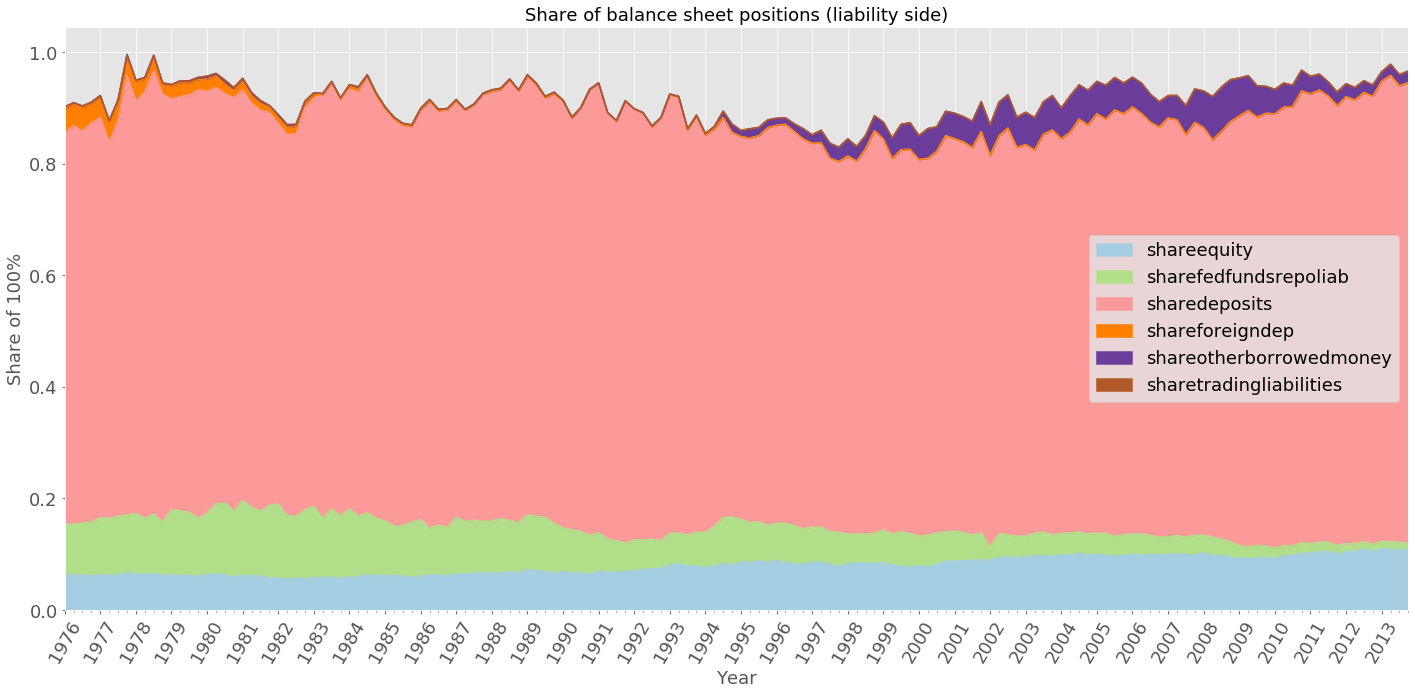

In [167]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of balance sheet positions (liability side)")
ax.set_ylabel("Share of 100%")
#df_agg.assets.plot(ax=ax)
viridis = cm.get_cmap('Paired', 12)
df_agg_share.plot.area(ax=ax, colormap=viridis)
#df_agg.plot.area(ax=ax, y=["shareCash","shareFedfundsrepoasset" ,"shareSecurities","shareLoansnet", "shareTradingassets", "shareInterestratederivatives", "shareOtherassets"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.set_xlabel("Year")
ax.grid(True)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/MedianBank_ShareofLiabilitiesMediumBank_7613.png')

Small Bank

In [168]:
df_big_banks_median_liab

df_agg_share = pd.DataFrame()

for (columnName, columnData) in df_big_banks_median_liab.iteritems():
    newcolumn = "share" + columnName
    df_agg_share[newcolumn] = df_big_banks_median_liab[columnName]/df_big_banks_median_liab.assets
    
    
df_agg_share.drop(["sharerssdid" , "shareassets", "shareliabilities"], axis=1, inplace=True)

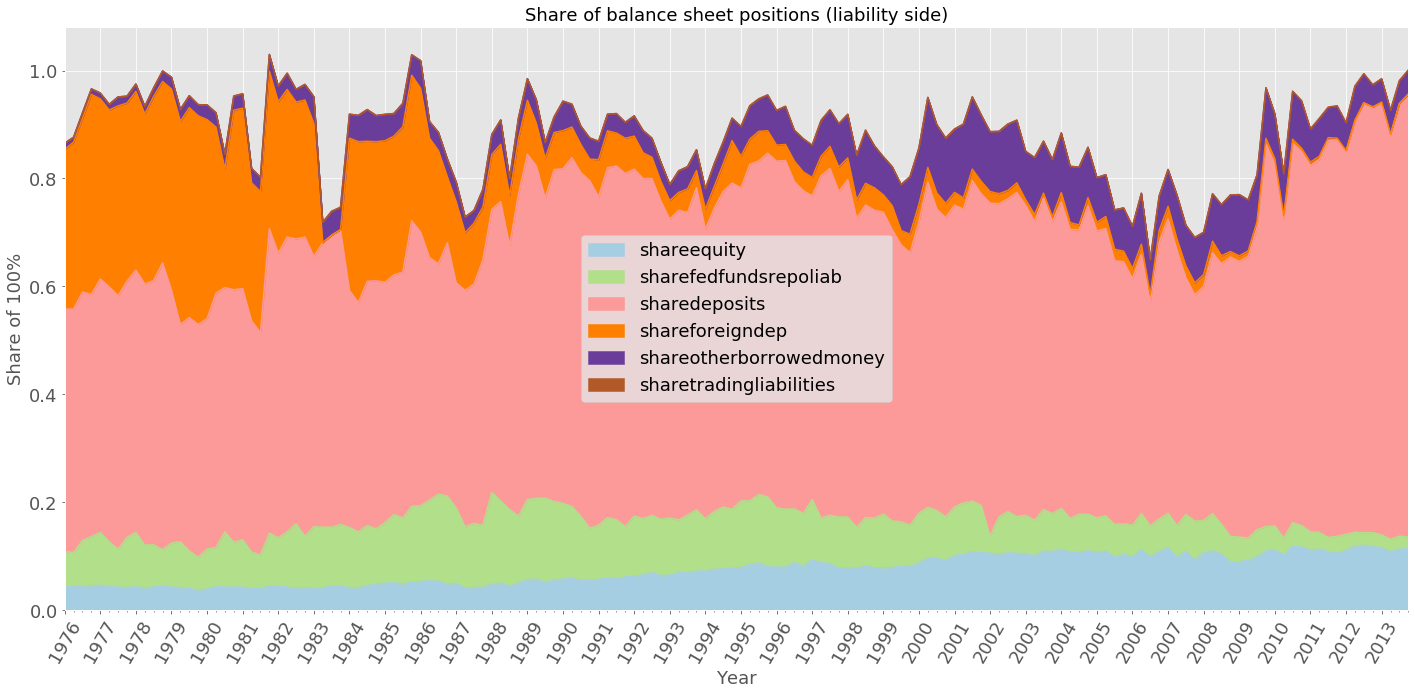

In [169]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Share of balance sheet positions (liability side)")
ax.set_ylabel("Share of 100%")
#df_agg.assets.plot(ax=ax)
viridis = cm.get_cmap('Paired', 12)
df_agg_share.plot.area(ax=ax, colormap=viridis)
#df_agg.plot.area(ax=ax, y=["shareCash","shareFedfundsrepoasset" ,"shareSecurities","shareLoansnet", "shareTradingassets", "shareInterestratederivatives", "shareOtherassets"])
ax.set_xticklabels(years, rotation=60)
ax.legend()
ax.set_xlabel("Year")
ax.grid(True)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/MedianBank_ShareofLiabilitiesBigBank_7613.png')